<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Online-Credit-Card-Transactions-Portfolio/blob/main/01_ModelDevelopment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ONLINE CREDIT CARD TRANSACTIONS**

Data Source: https://www.kaggle.com/adityakadiwal/credit-card-fraudulent-transactions

***KPI: Over 90k credit card transactions marked as Fraudulent or Legitimate***

author = Hoagonde Amedegnato

email = amereine69@gmail.com

## **PERFORM MARKET SEGMENTATION USING SUPERVISED AND UNSUPERVISED MACHINE LEARNING TECHNIQUES**

***In this notebook, I am going to calculate the Accuracy Score and the Confusion Matrix of these Supervised Machine Learning:***

- Logistic Regression
- Decision Tree
- Support Vector Machines
- Random Forest
- XGBoost

***I am going to develop as well the Principal Component Analysis(PCA):***

- PCA is an unsupervised machine learning algorithm
- PCA performs dimensionality reductions while attempting at keeping the original information unchanged
- PCA works by trying to find a new set of features called components
- Components are composites of the uncorrelated given imput features.

***I am going to develop the K-Means intuition, by the optimal number of clusters using Elbow method:***

- K-Means is an unsupervised learning algorithm (clustering)
- K-Means works by grouping some data points together (clustering) in an unsupervised fashion
- The algorythm groups observations with similar attribute values together by measuring the Euclidian distance between points.

***I am going to develop the AutoEncoders intuition:***

- Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding
- Auto encoders use the same input data for the input and output
- Auto encoders work by adding a bottleneck in the network
- This bottleneck forces the network to create a compressed (encoded) version of the original input
- Auto encoders work well if correlations exists between input data (performs poorly if the all input data is independent).

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Import Libraries***

In [ ]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data #analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from termcolor import colored as cl # text customization
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, normalize
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 432x216 with 0 Axes>

In [ ]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/CC_FRAUD.csv (1).zip')
creditcard_df

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,LEGIT
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,LEGIT
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,LEGIT
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,LEGIT
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,LEGIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94677,XOSOP.COM,MO,685,11,11,0,0,0,1,1,0,1,3,0,8.112,15,1,49.95,49.95,LEGIT
94678,RONHGNCN.COM,KR,108,16,16,0,0,1,0,0,1,1,4,0,11.248,10,4,12.95,12.95,LEGIT
94679,XOSOP.COM,VO,601,18,18,0,0,1,1,1,0,1,2,0,27.824,23,0,38.85,38.85,LEGIT
94680,VUHZRNB.COM,LO,398,23,23,0,0,0,0,0,0,1,3,0,31.904,20,0,12.95,12.95,LEGIT


In [ ]:
# Let's drop 'DOMAIN' columns from creditcard_df
creditcard_df.drop("DOMAIN", axis = 1, inplace= True)

In [ ]:
# Let's drop 'DOMAIN' columns from creditcard_df
creditcard_df.drop("STATE", axis = 1, inplace= True)

In [ ]:
# Let's check the count
creditcard_df.shape

(94682, 18)

In [ ]:
# Let's see if I have duplicated entries in the data
creditcard_df.duplicated().sum()

5068

In [ ]:
# Let's remove the duplicated data of 5068
creditcard_df.drop_duplicates(inplace=True)

In [ ]:
# Let's see if I have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [ ]:
# Let's check the count again
creditcard_df.shape

(89614, 18)

In [ ]:
# Let's filter or extract all FRAUD columns from TRN_TYPE and recall creditcard_df
# Here is the display of 2052 cards that are marked as fraudulent transactions
Fraud = creditcard_df[creditcard_df.TRN_TYPE == 'FRAUD']

In [ ]:
# Let's filter or extract all LEGIT columns from TRN_TYPE and recall creditcard_df
# Here is the display of 87562 cards that are marked as legitimate transactions
Legit = creditcard_df[creditcard_df.TRN_TYPE == 'LEGIT']

In [ ]:
# Number of Fraudulent Transactions = 2052
Legit_sample = Legit.sample(n=2052)

## ***Concatenating two DataFrames***

In [ ]:
new_dataset = pd.concat([Legit_sample, Fraud], axis = 0)

In [ ]:
new_dataset.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
5626,166,12,12,0,0,1,1,1,0,1,3,1,50.072,29,0,31.08,31.08,LEGIT
44291,420,22,22,0,0,0,0,0,0,1,2,0,12.648,19,0,10.36,10.36,LEGIT
5898,685,15,15,0,0,1,0,0,0,2,3,1,-12.672,13,0,25.90,25.90,LEGIT
11328,655,15,15,0,0,0,1,0,0,1,3,1,-1.512,13,0,12.95,12.95,LEGIT
82737,386,20,20,0,0,0,0,0,0,1,0,1,-40.248,12,0,38.85,38.85,LEGIT


In [ ]:
new_dataset.tail()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
94528,649,8,8,0,0,0,0,0,0,1,3,0,-23.080,23,0,44.85,44.85,FRAUD
94544,669,13,13,0,0,0,0,0,0,1,2,0,-13.856,22,0,12.95,12.95,FRAUD
94565,649,7,7,0,0,0,0,0,0,1,3,1,32.664,26,3,25.90,25.90,FRAUD
94606,669,20,20,0,0,0,0,0,0,1,2,1,12.120,22,0,38.85,38.85,FRAUD
94659,685,14,14,0,0,1,1,0,0,1,3,1,6.224,13,0,12.95,12.95,FRAUD


In [ ]:
new_dataset['TRN_TYPE'].value_counts()

LEGIT    2052
FRAUD    2052
Name: TRN_TYPE, dtype: int64

In [ ]:
new_dataset.groupby('TRN_TYPE').mean()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
TRN_TYPE,,,,,,,,,,,,,,,,,
FRAUD,558.100877,13.808967,13.831871,0.117446,0.019006,0.544834,0.535088,0.386452,0.012671,4.047271,2.462476,0.431774,6.197973,14.073587,1.367446,24.972315,24.972315
LEGIT,453.340643,13.813353,13.814327,0.113548,0.015595,0.552144,0.537524,0.400585,0.020955,9.259747,2.402047,0.409357,5.431092,13.692982,1.465887,25.793718,25.793718


## ***Splitting the data into Features and Targets***

In [ ]:
X = new_dataset.drop(columns = 'TRN_TYPE', axis=1)

In [ ]:
Y = new_dataset['TRN_TYPE']

In [ ]:
print(X)

       ZIPCODE  TIME1  TIME2  VIS1  ...  VAR4  VAR5  TRN_AMT  TOTAL_TRN_AMT
5626       166     12     12     0  ...    29     0    31.08          31.08
44291      420     22     22     0  ...    19     0    10.36          10.36
5898       685     15     15     0  ...    13     0    25.90          25.90
11328      655     15     15     0  ...    13     0    12.95          12.95
82737      386     20     20     0  ...    12     0    38.85          38.85
...        ...    ...    ...   ...  ...   ...   ...      ...            ...
94528      649      8      8     0  ...    23     0    44.85          44.85
94544      669     13     13     0  ...    22     0    12.95          12.95
94565      649      7      7     0  ...    26     3    25.90          25.90
94606      669     20     20     0  ...    22     0    38.85          38.85
94659      685     14     14     0  ...    13     0    12.95          12.95

[4104 rows x 17 columns]


In [ ]:
print(Y)

5626     LEGIT
44291    LEGIT
5898     LEGIT
11328    LEGIT
82737    LEGIT
         ...  
94528    FRAUD
94544    FRAUD
94565    FRAUD
94606    FRAUD
94659    FRAUD
Name: TRN_TYPE, Length: 4104, dtype: object


## ***Split the data into Training data and Testing data***

In [ ]:
# Let's split my train (80%) and test (20%) data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4104, 17) (3283, 17) (821, 17)


## ***Model Training and Model Evaluation***



- *Logistic Regression*

In [ ]:
model = LogisticRegression()

In [ ]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the Logistic Regression on Training Data:', training_data_accuracy)

Accuracy Score of the Logistic Regression on Training Data: 0.6125494974109047


In [ ]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the Logistic Regression on Test Data:', test_data_accuracy)

Accuracy Score of the Logistic Regression on Test Data: 0.6370280146163215


In [ ]:
# Check the confusion matrix
confusion_matrix(Y_test, model.predict(X_test), labels = ['LEGIT', 'FRAUD'])

array([[219, 191],
       [107, 304]])

Here, the first row represents positive and the second row represents negative. So, I have 219 as true positive and 191 are false positive. That says, out of 219+191=410, I have 219 that are successfully classified as a normal transaction and 191 were falsely classified as normal — but they were fraudulent.

- *Decision Tree*

In [ ]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')

In [ ]:
# Training the Decision Tree Model with Training Data
DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Accuracy on training data
X_train_prediction = DT.predict(X_train)

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the Decision Tree model on Training Data:', training_data_accuracy)

Accuracy Score of the Decision Tree model on Training Data: 0.7094121230581785


In [ ]:
# Accuracy on test data
X_test_prediction = DT.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the Decision Tree model on Test Data:', test_data_accuracy)

Accuracy Score of the Decision Tree model on Test Data: 0.7429963459196103


In [ ]:
# Check the confusion matrix
confusion_matrix(Y_test, DT.predict(X_test), labels = ['LEGIT', 'FRAUD'])

array([[360,  50],
       [161, 250]])

Here, the first row represents positive and the second row represents negative. So, I have 360 as true positive and 50 are false positive. That says, out of 360+50=410, I have 360 that are successfully classified as a normal transaction and 50 were falsely classified as normal — but they were fraudulent.

- *Support Vector Machines*

In [ ]:
svm = SVC()

In [ ]:
# Training the Support Vector Machines Model with Training Data
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Accuracy on training data
X_train_prediction = svm.predict(X_train)

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the Support Vector Machines model on Training Data:', training_data_accuracy)

Accuracy Score of the Support Vector Machines model on Training Data: 0.6171184891867194


In [ ]:
# Accuracy on test data
X_test_prediction = svm.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the Support Vector Machines model on Test Data:', test_data_accuracy)

Accuracy Score of the Support Vector Machines model on Test Data: 0.6443361753958587


In [ ]:
# Check the confusion matrix
confusion_matrix(Y_test, svm.predict(X_test), labels = ['LEGIT', 'FRAUD'])

array([[216, 194],
       [ 98, 313]])

Here, the first row represents positive and the second row represents negative. So, I have 216 as true positive and 194 are false positive. That says, out of 216+194=410, I have 216 that are successfully classified as a normal transaction and 194 were falsely classified as normal — but they were fraudulent.

- *Random Forest*

In [ ]:
rf = RandomForestClassifier(max_depth = 4)

In [ ]:
# Training the Random Forest Model with Training Data
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Accuracy on training data
X_train_prediction = rf.predict(X_train)

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the Random Forest model on Training Data:', training_data_accuracy)

Accuracy Score of the Random Forest model on Training Data: 0.674383186110265


In [ ]:
# Accuracy on test data
X_test_prediction = rf.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the Random Forest model on Test Data:', test_data_accuracy)

Accuracy Score of the Random Forest model on Test Data: 0.7003654080389768


In [ ]:
# Check the confusion matrix
confusion_matrix(Y_test, rf.predict(X_test), labels = ['LEGIT', 'FRAUD'])

array([[288, 122],
       [124, 287]])

Here, the first row represents positive and the second row represents negative. So, I have 288 as true positive and 122 are false positive. That says, out of 288+122=410, I have 288 that are successfully classified as a normal transaction and 122 were falsely classified as normal — but they were fraudulent.

- *XGBoost*

In [ ]:
xgb = XGBClassifier(max_depth = 4)

In [ ]:
# Training the XGBoost Model with Training Data
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Accuracy on training data
X_train_prediction = xgb.predict(X_train)

In [ ]:
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy Score of the XGBoost model on Training Data:', training_data_accuracy)

Accuracy Score of the XGBoost model on Training Data: 0.7721596101127018


In [ ]:
# Accuracy on test data
X_test_prediction = xgb.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy Score of the XGBoost model on Test Data:', test_data_accuracy)

Accuracy Score of the XGBoost model on Test Data: 0.7295980511571255


In [ ]:
# Check the confusion matrix
confusion_matrix(Y_test, xgb.predict(X_test), labels = ['LEGIT', 'FRAUD'])

array([[354,  56],
       [166, 245]])

Here, the first row represents positive and the second row represents negative. So, I have 354 as true positive and 56 are false positive. That says, out of 354+56=410, I have 354 that are successfully classified as a normal transaction and 56 were falsely classified as normal — but they were fraudulent.

 ***Conclusion***

I have received 77.21% accuracy on Training data and 74.29% accuracy on Test data in my credit card fraud detection; which means that:

*XGBoost* and *Decision Tree* are the winners, since they represent the highest score, respectively, 0.7721596101127018 in term of an accuracy score of the training data and 0.7429963459196103 in term of an accuracy score of the test data.

- *Principal Component Analysis (PCA) and Visualize the Results*

In [ ]:
# Let's drop 'TRN_TYPE' columns from creditcard_df
creditcard_df.drop("TRN_TYPE", axis = 1, inplace= True)

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(89614, 17)

In [ ]:
creditcard_df_scaled

array([[ 0.98011748, -0.36044512, -0.36304286, ..., -0.5651839 ,
        -0.94391273, -0.94266499],
       [ 1.00184288,  0.77915193,  0.77769076, ..., -0.5651839 ,
         0.88435526,  0.88446522],
       [-0.07573682, -2.06984069, -2.07414328, ...,  0.26498829,
         0.88435526,  0.88446522],
       ...,
       [ 0.6585816 ,  0.77915193,  0.77769076, ..., -0.5651839 ,
         0.88435526,  0.88446522],
       [-0.22346952,  1.72881614,  1.7283021 , ..., -0.5651839 ,
        -0.94391273, -0.94266499],
       [ 0.89321589, -0.55037796, -0.55316513, ..., -0.5651839 ,
         0.47352439,  0.47389001]])

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[ 0.09529233,  0.39080164],
       [ 1.54306278, -1.02483298],
       [ 1.219094  ,  3.1713046 ],
       ...,
       [ 1.51786673, -0.70658349],
       [-0.39202348, -2.78039222],
       [ 0.87679567,  0.80210838]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,0.095292,0.390802
1,1.543063,-1.024833
2,1.219094,3.171305
3,-0.946215,-2.743648
4,-1.258884,1.046530


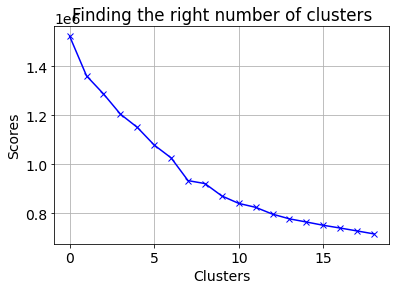

In [ ]:
# Find the optimal number of clusters using Elbow method

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()


In [ ]:
# Use 8 clusters
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.095292,0.390802,4
1,1.543063,-1.024833,6
2,1.219094,3.171305,7
3,-0.946215,-2.743648,0
4,-1.258884,1.046530,7


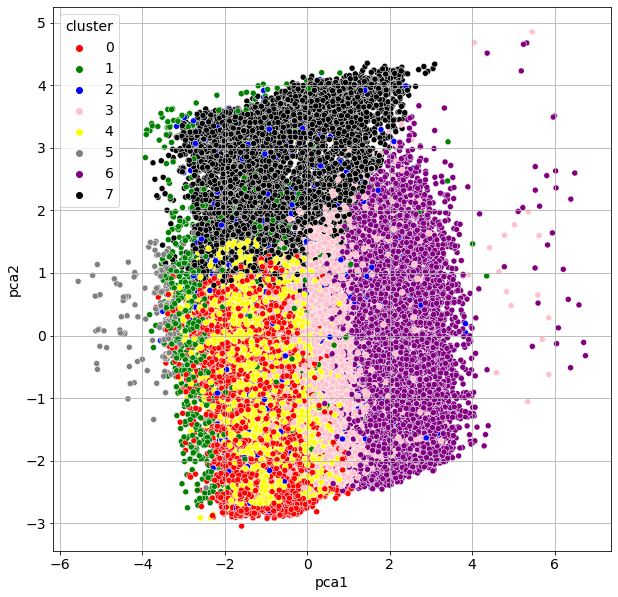

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

- *K-Means and Visualize the Results*

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers 

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
0,-0.001540,0.319947,0.320020,0.031985,-0.135429,-0.129569,-0.881935,-0.697916,-0.138724,-0.044465,0.048917,0.032360,0.103573,0.074875,-0.074442,-0.930299,-0.930246
1,0.000071,-0.077631,-0.079270,-0.023933,-0.059565,0.653442,-0.089997,0.022164,7.208561,-0.043628,0.279404,-0.145633,-0.205080,-0.701198,1.311202,-0.217675,-0.217964
2,0.013202,-0.055499,-0.050485,-0.352454,7.383964,0.206594,-0.073961,-0.120410,-0.106316,-0.038898,-0.017076,0.017283,-0.038881,-0.077225,0.002127,-0.076294,-0.075587
3,-0.069926,0.187981,0.187159,-0.010763,-0.135429,0.910998,-0.027244,-0.108511,-0.138724,-0.046123,-0.142460,-0.097049,-0.041105,-0.646952,0.197610,0.878207,0.878321
4,0.021976,0.263176,0.262814,0.033834,-0.135429,0.476159,0.759212,0.774055,-0.138724,-0.019387,0.095546,-0.014083,0.080396,-0.116861,0.087021,-0.897457,-0.897676
5,0.320846,-0.387892,-0.388319,-0.049013,0.299218,-0.675149,0.896828,1.203095,-0.138724,20.961254,1.509744,0.126449,-0.178450,-0.582132,0.461734,-1.725946,-1.771739
6,0.044456,0.189980,0.192686,-0.043066,-0.135429,-1.012775,0.177904,0.082261,-0.138724,-0.047299,-0.052605,0.089107,-0.124048,0.572432,-0.250300,1.006025,1.006059
7,-0.036921,-1.725782,-1.730642,0.054851,-0.135429,0.199527,-0.028009,-0.070931,-0.138724,-0.045804,0.010954,-0.070700,0.054595,-0.114222,0.031628,-0.257400,-0.256668


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
0,449.076093,15.582276,15.592758,0.123991,2.872702e-15,0.468714,0.102138,0.057436,1.443290e-15,1.487790,2.462058,0.444765,8.767782,14.547741,1.182266,13.142858,13.126046
1,449.446884,13.489021,13.492582,0.106231,1.008902e-02,0.859347,0.496736,0.410089,1.000000e+00,1.570326,2.693769,0.356677,-0.955765,9.483086,4.520475,23.238184,23.222813
2,452.468809,13.605545,13.643982,0.001890,1.000000e+00,0.636421,0.504726,0.340265,4.410838e-03,2.036547,2.395715,0.437303,4.280015,13.555135,1.366730,25.241040,25.241040
3,433.337387,14.887474,14.893938,0.110414,-1.436351e-15,0.987838,0.528004,0.346092,-2.799844e-15,1.324394,2.269667,0.380721,4.209968,9.837099,1.837675,38.762898,38.762898
4,454.488087,15.283378,15.291863,0.124579,1.464107e-15,0.770904,0.919870,0.778321,5.898060e-17,3.959935,2.508935,0.421780,8.037642,13.296471,1.571252,13.608107,13.587732
5,523.271676,11.855491,11.867052,0.098266,5.780347e-02,0.196532,0.988439,0.988439,-4.510281e-17,2072.138728,3.930636,0.491329,-0.116855,10.260116,2.473988,1.871387,1.197688
6,459.661877,14.898001,14.923008,0.100154,6.408069e-15,0.028095,0.630222,0.439521,4.919676e-15,1.208458,2.359998,0.472849,1.596992,17.794801,0.758600,40.573619,40.573619
7,440.933359,4.811474,4.806741,0.131254,3.920475e-16,0.632895,0.527622,0.364497,-1.526557e-15,1.355805,2.423894,0.393761,7.224814,13.313695,1.437802,22.675426,22.674175


In [ ]:
labels.shape # Labels associated to each data point

(89614,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
Y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
Y_kmeans

array([2, 3, 0, ..., 0, 2, 3], dtype=int32)

In [ ]:
# concatenate the clusters labels to my original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,cluster
0,675.0,12.0,12.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,16.680,34.0,0.0,12.95,12.95,4.0
1,680.0,18.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,37.880,23.0,0.0,38.85,38.85,6.0
2,432.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,-9.080,19.0,2.0,38.85,38.85,7.0
3,119.0,23.0,23.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,-6.392,18.0,0.0,11.01,11.01,0.0
4,614.0,9.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,42.512,7.0,0.0,12.95,12.95,7.0


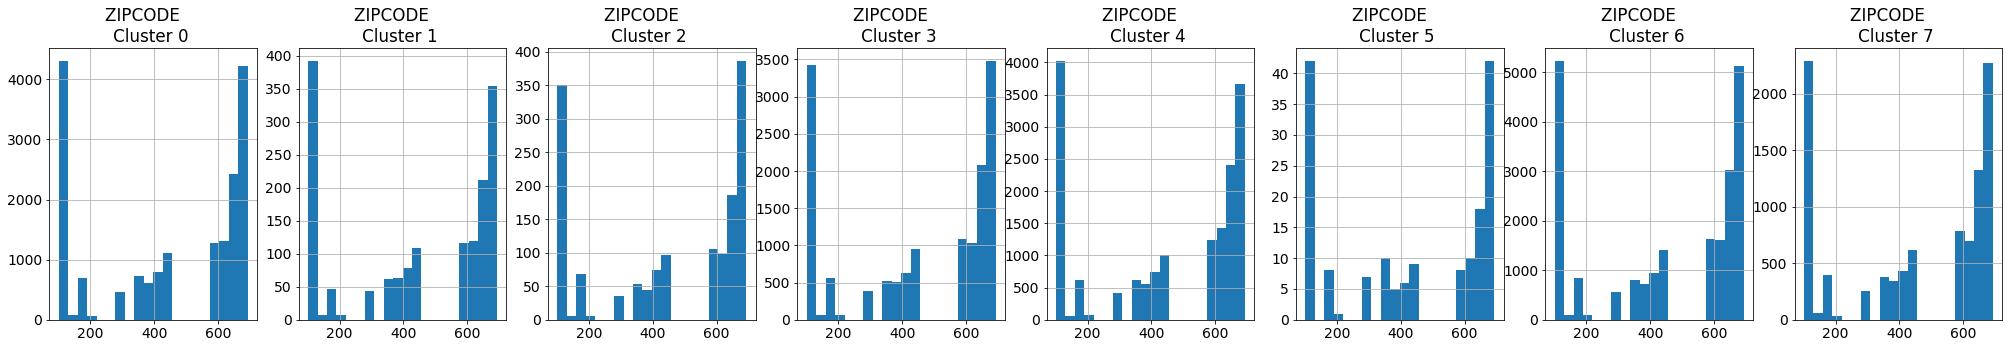

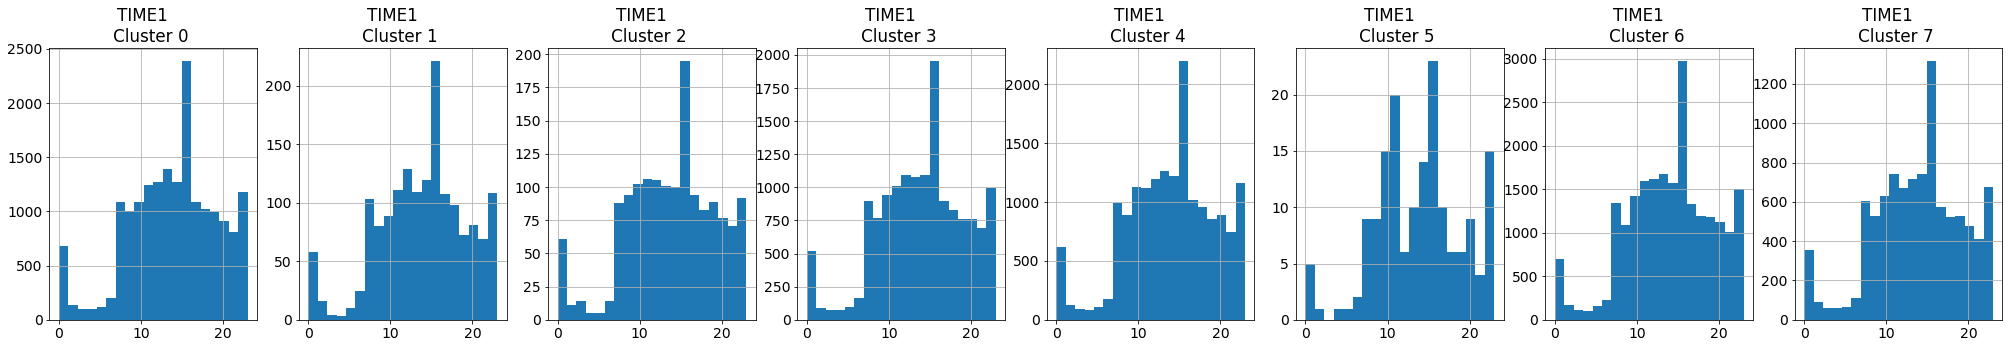

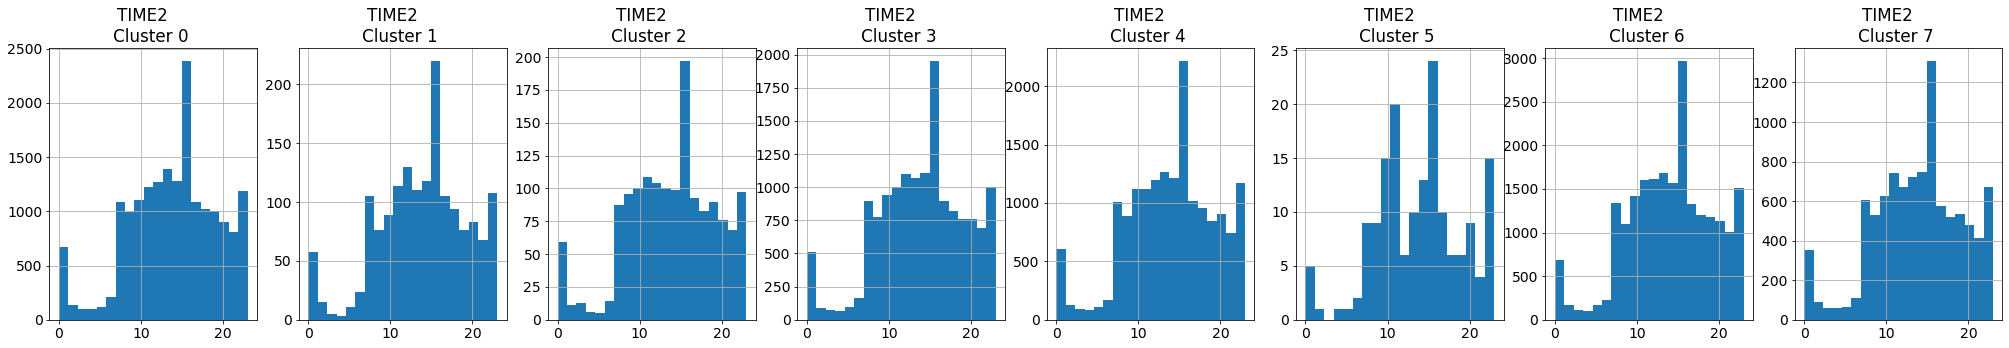

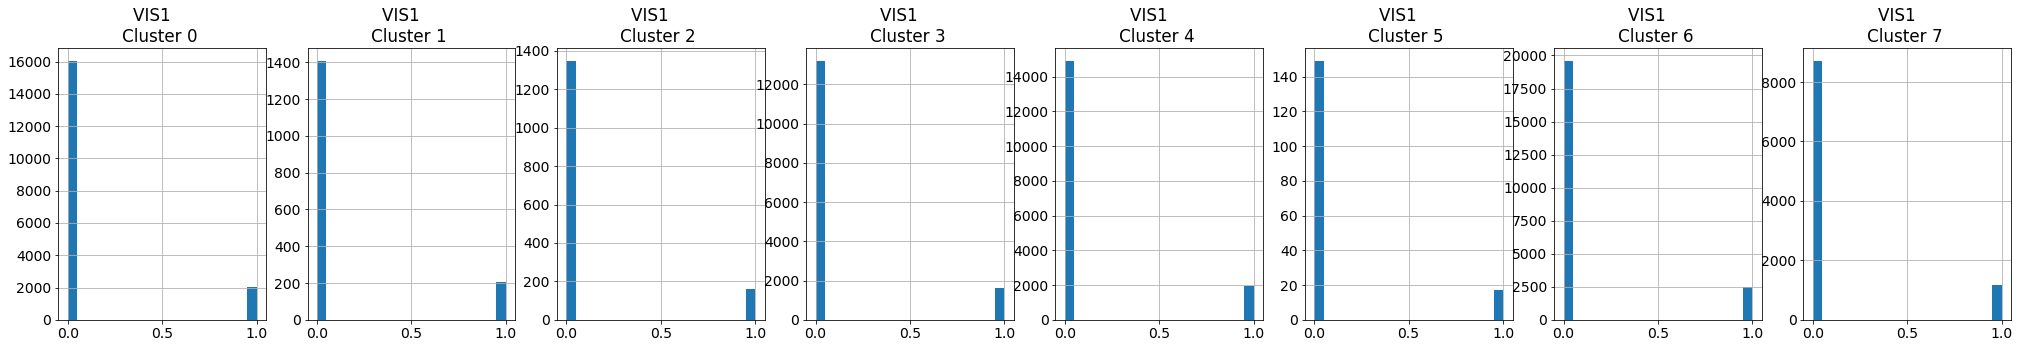

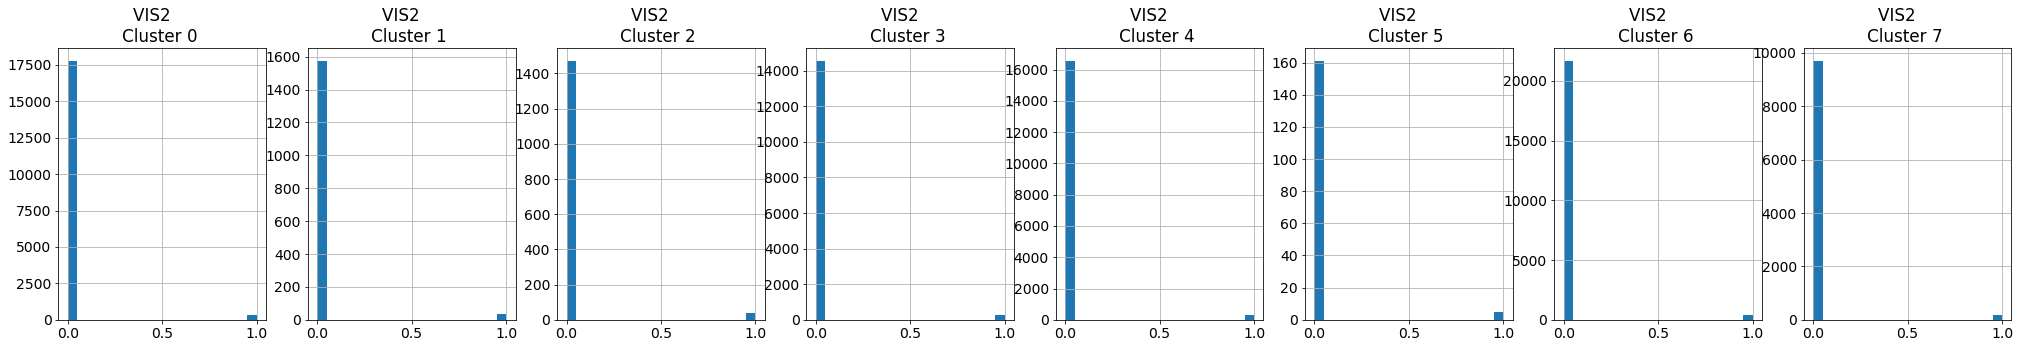

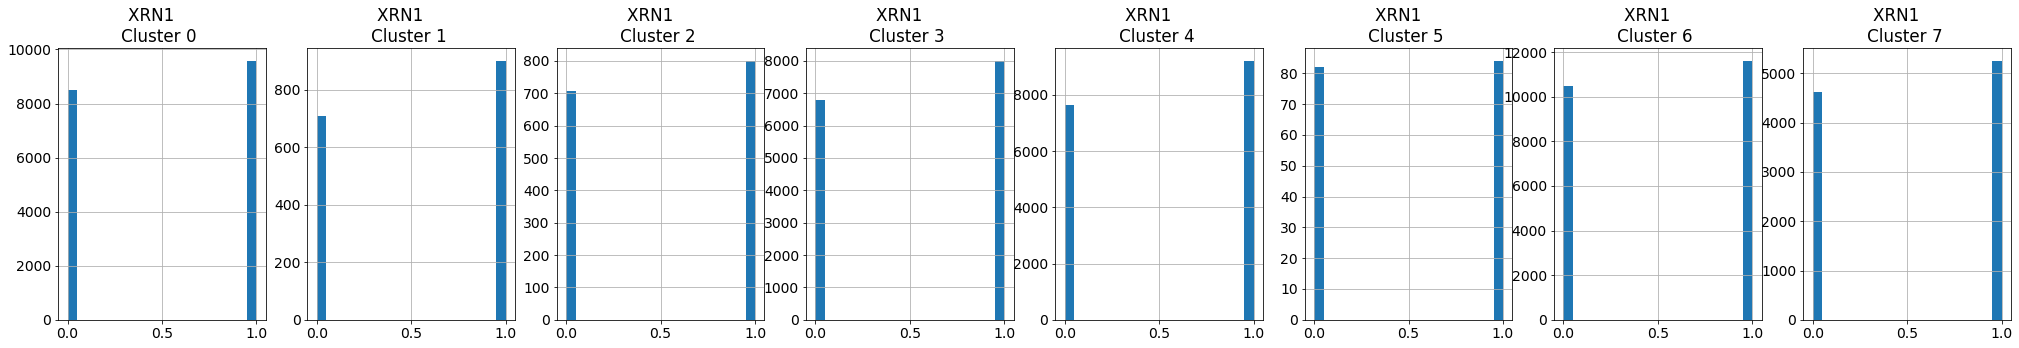

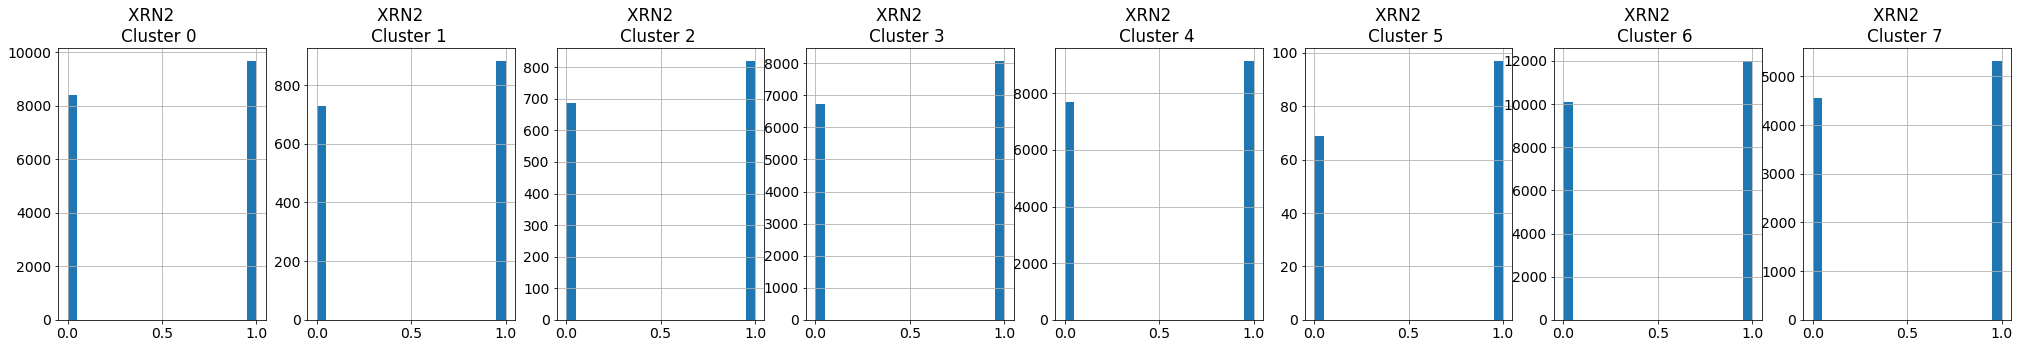

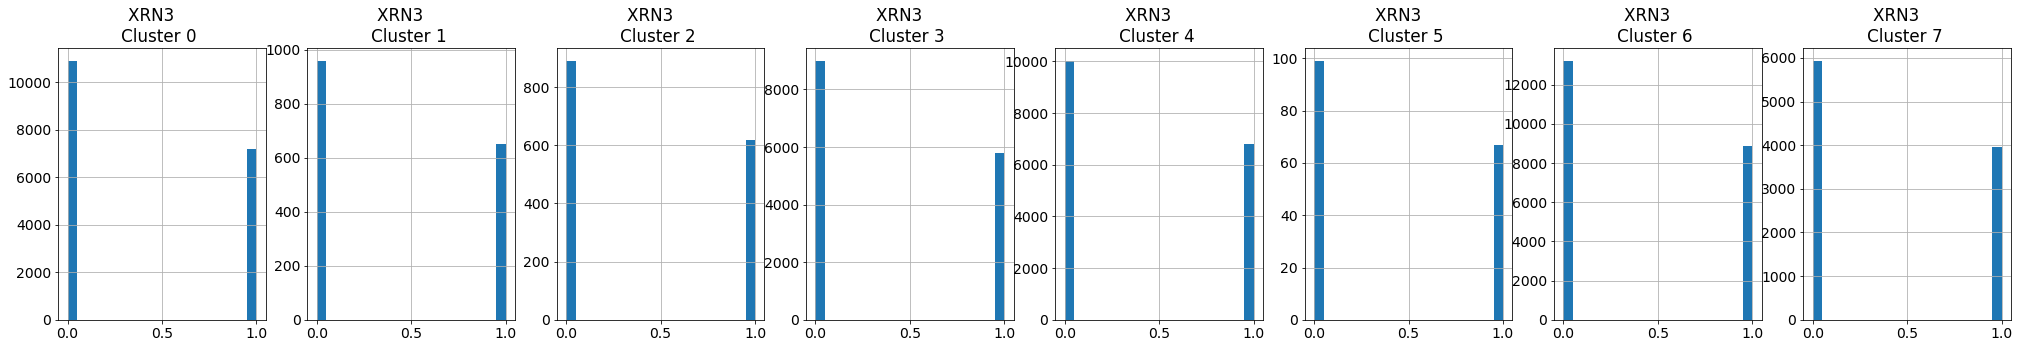

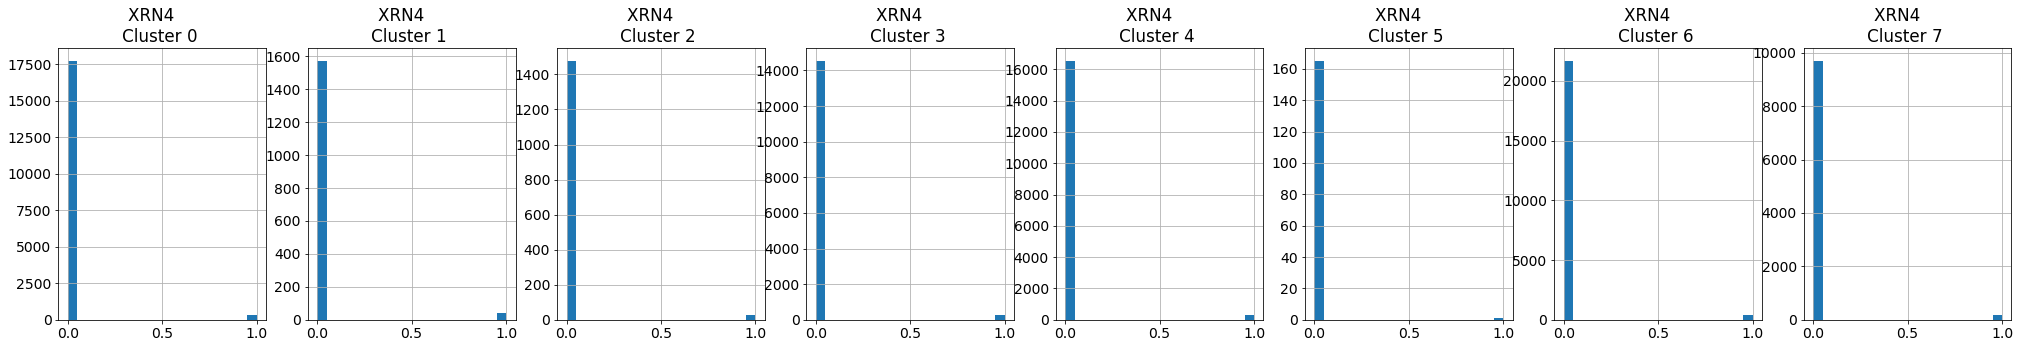

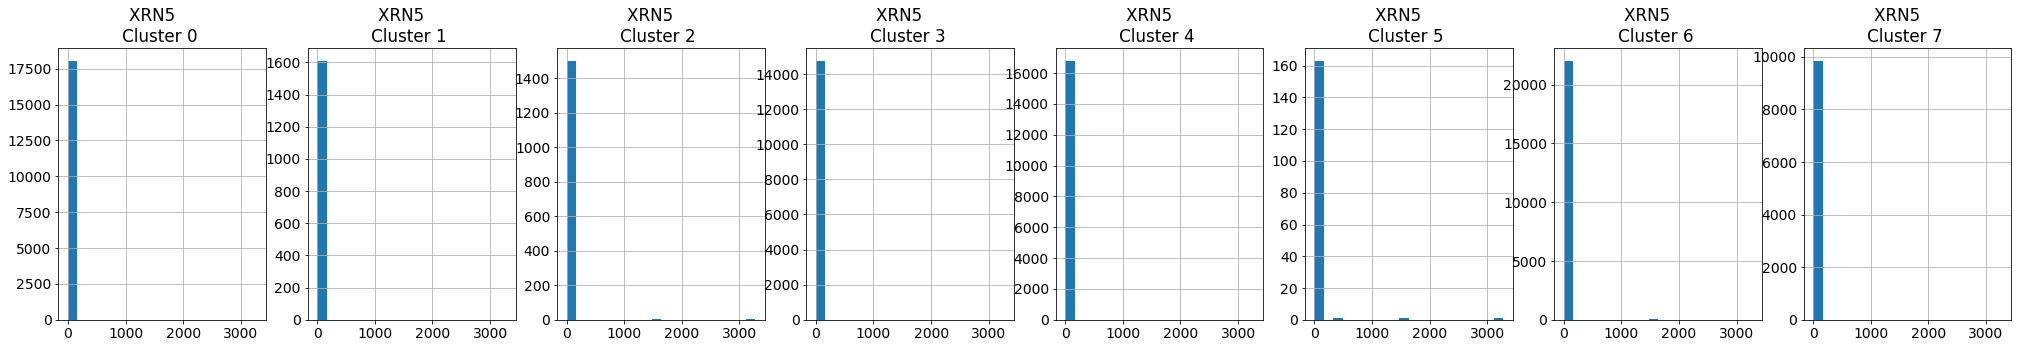

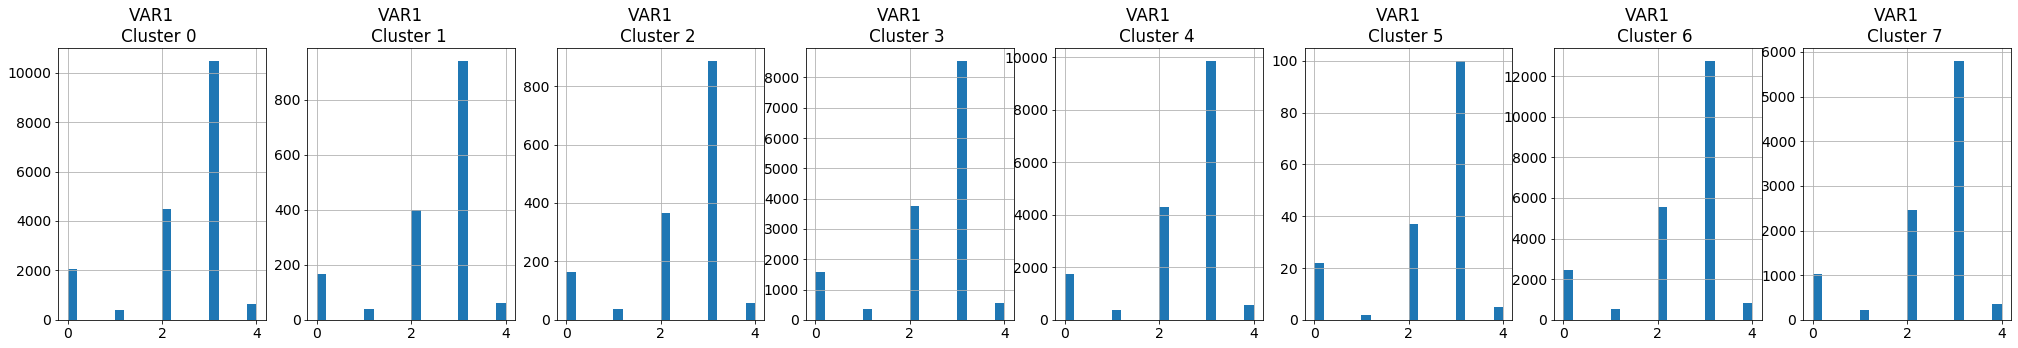

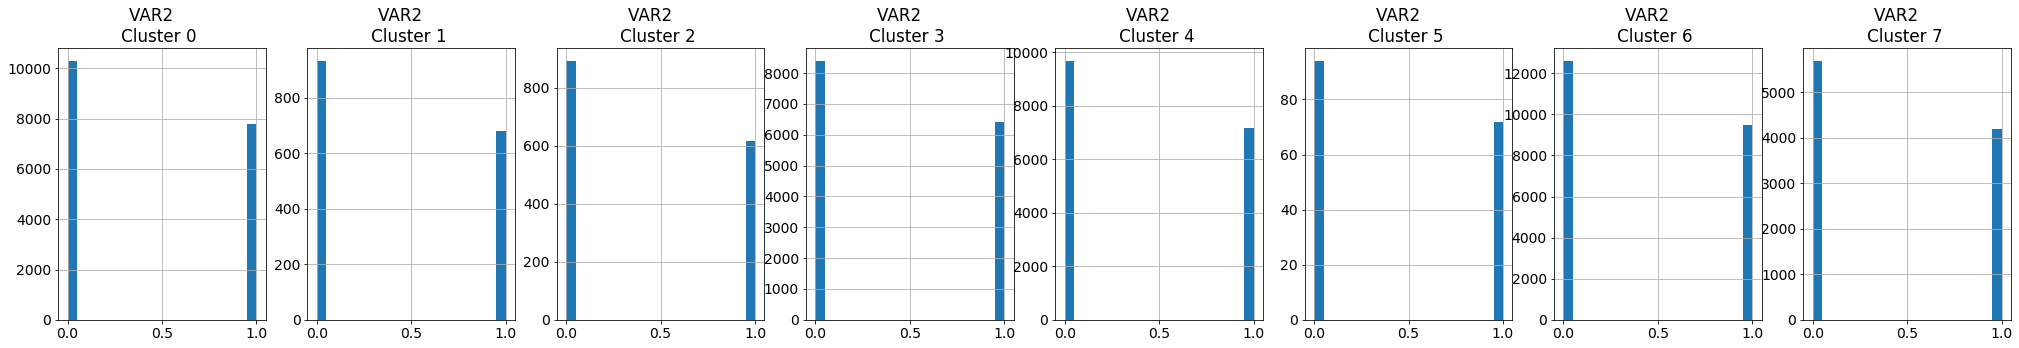

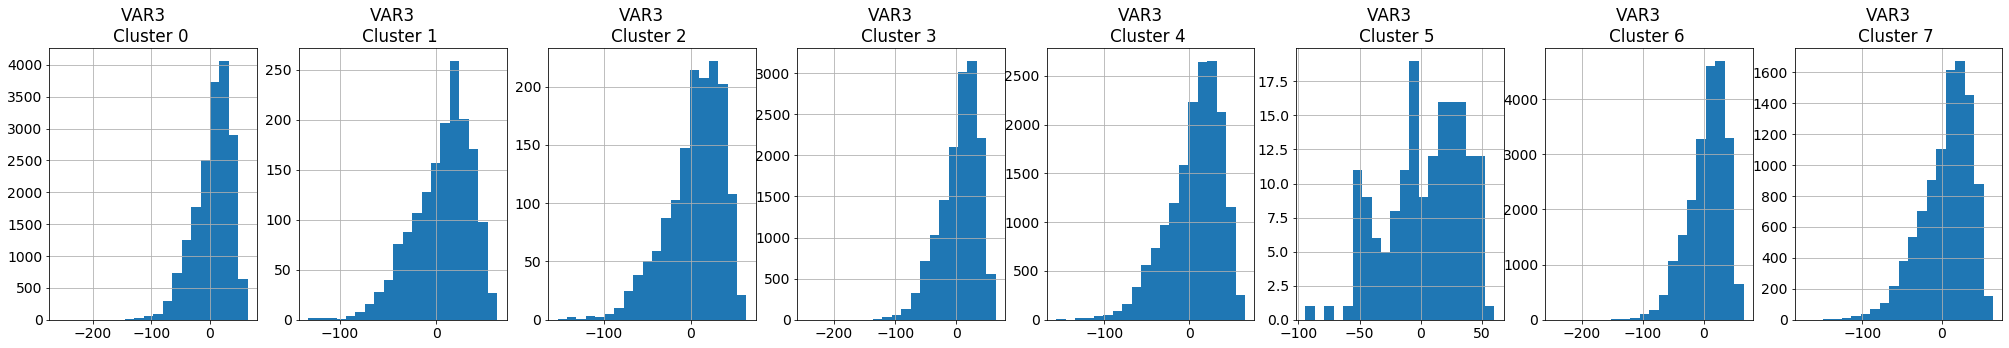

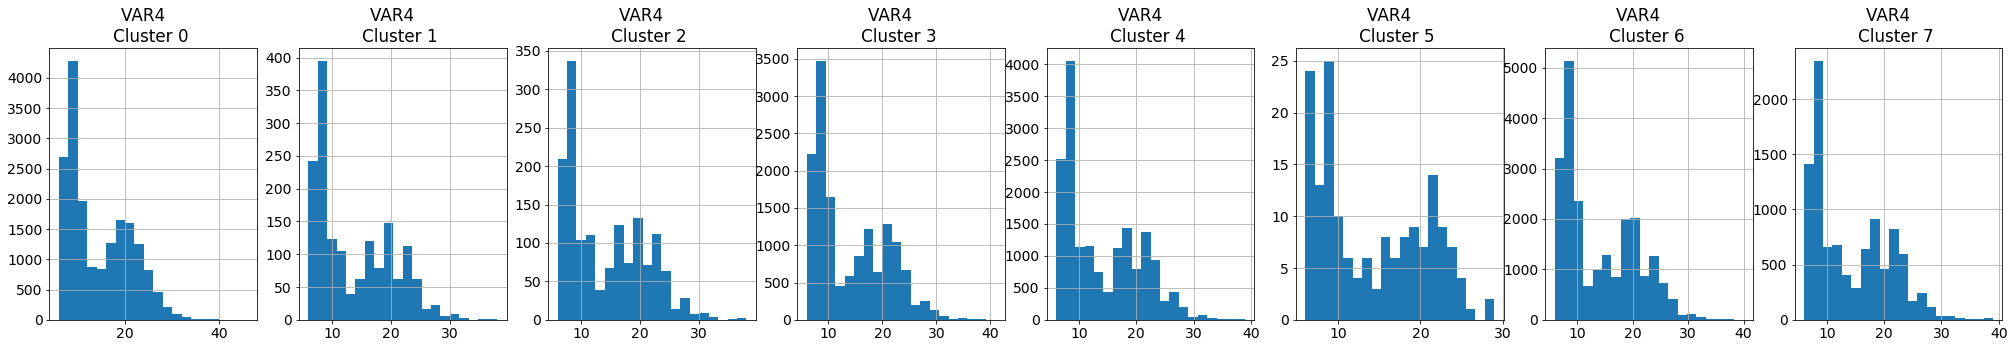

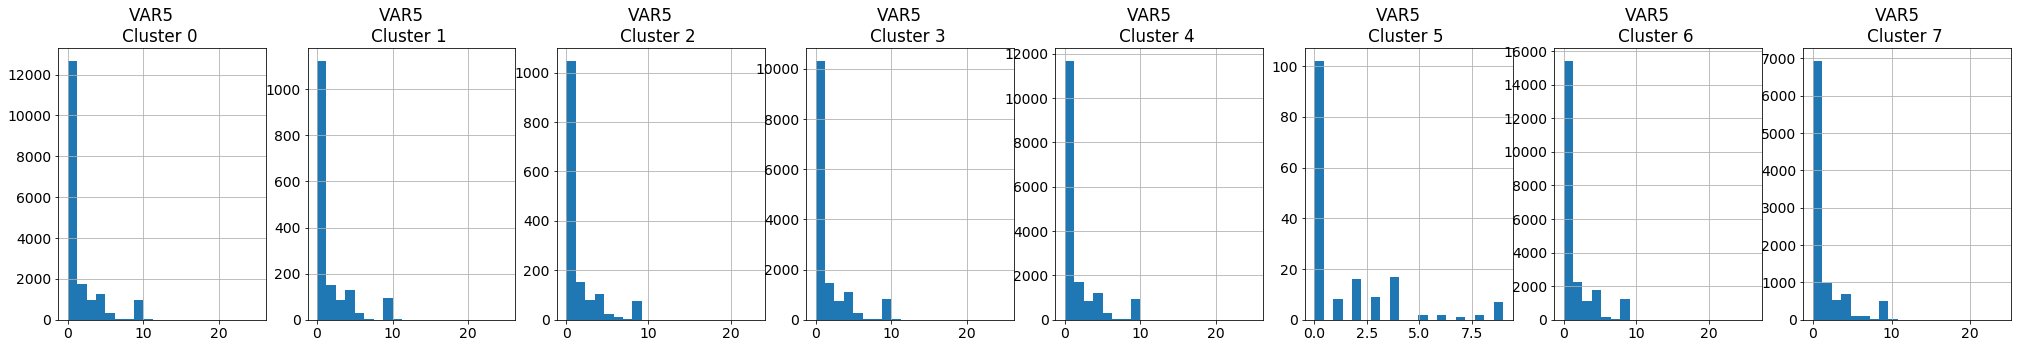

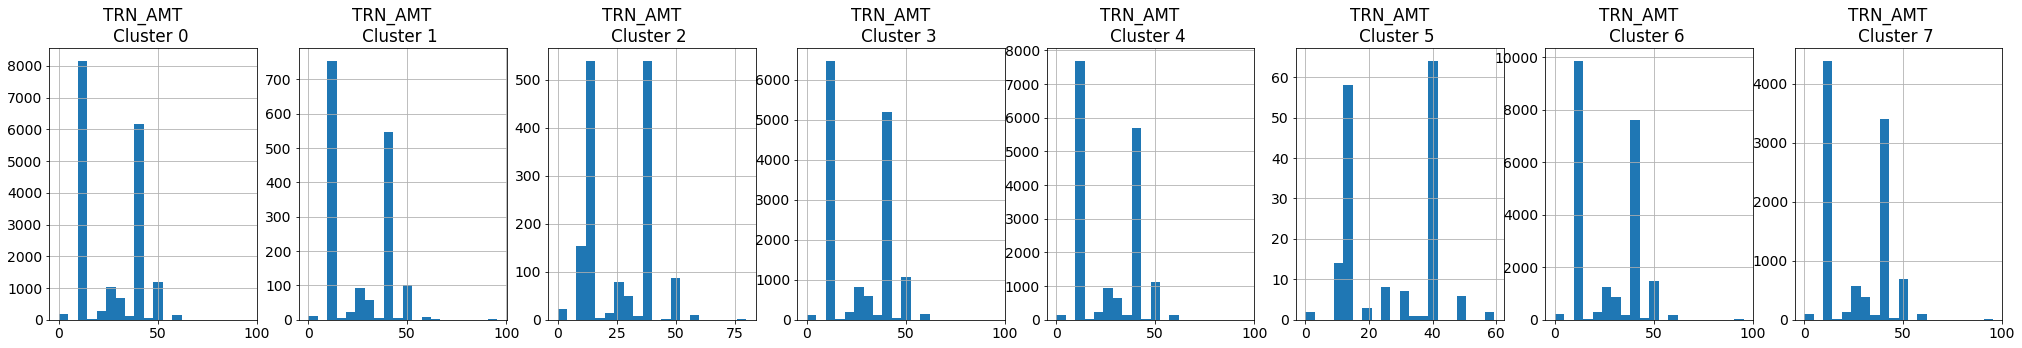

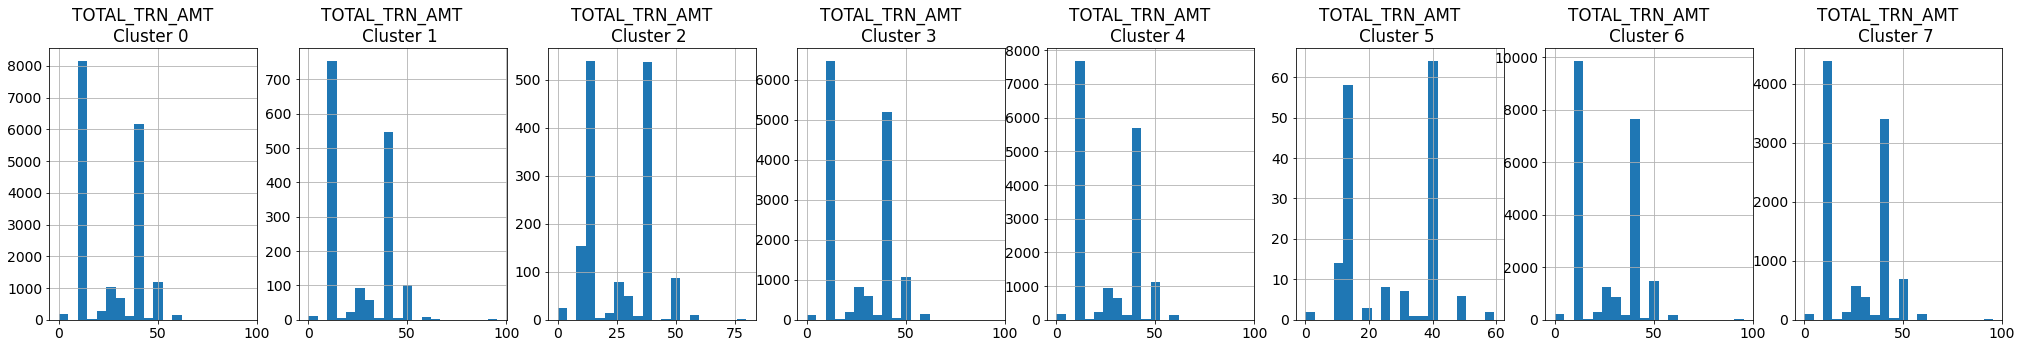

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

- *Dimensionality Reduction Using Autoencoders and Visualize the results*

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform


encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for my dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
creditcard_df_scaled.shape

(89614, 17)

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
701/701 [==============================] - 37s 51ms/step - loss: 0.3266
Epoch 2/25
701/701 [==============================] - 36s 52ms/step - loss: 0.1103
Epoch 3/25
701/701 [==============================] - 36s 52ms/step - loss: 0.0549
Epoch 4/25
701/701 [==============================] - 37s 52ms/step - loss: 0.0391
Epoch 5/25
701/701 [==============================] - 36s 52ms/step - loss: 0.0345
Epoch 6/25
701/701 [==============================] - 36s 52ms/step - loss: 0.0328
Epoch 7/25
701/701 [==============================] - 36s 51ms/step - loss: 0.0292
Epoch 8/25
701/701 [==============================] - 36s 52ms/step - loss: 0.0277
Epoch 9/25
701/701 [==============================] - 36s 52ms/step - loss: 0.0268
Epoch 10/25
701/701 [==============================] - 37s 52ms/step - loss: 0.0222
Epoch 11/25
701/701 [==============================] - 37s 53ms/step - loss: 0.0228
Epoch 12/25
701/701 [==============================] - 37s 52ms/step - loss: 0.0177
E

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred

array([[0.        , 0.9962323 , 0.        , ..., 0.        , 1.5209169 ,
        2.2187932 ],
       [0.        , 2.481429  , 0.        , ..., 0.        , 2.0744872 ,
        0.46885076],
       [0.        , 2.2949202 , 0.        , ..., 0.        , 3.3950522 ,
        3.2672367 ],
       ...,
       [0.64033836, 1.2809236 , 0.8590379 , ..., 0.        , 0.06329706,
        1.2843485 ],
       [0.76935077, 0.652526  , 0.5021942 , ..., 0.        , 2.2479167 ,
        0.08013147],
       [1.0446966 , 1.0965856 , 0.70217806, ..., 0.        , 2.5127285 ,
        0.95178765]], dtype=float32)

In [ ]:
pred.shape

(89614, 10)

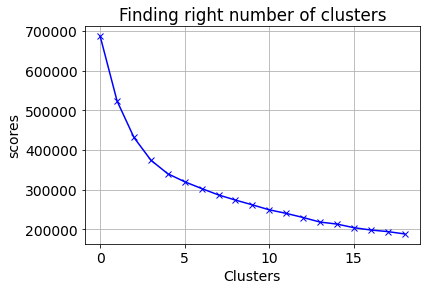

In [ ]:
# Obtain optimal K
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

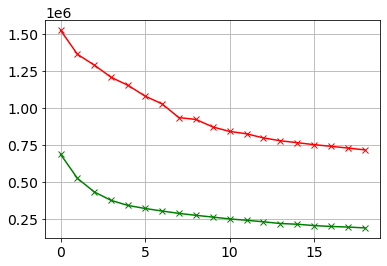

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g');

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,cluster
0,675.0,12.0,12.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,16.680,34.0,0.0,12.95,12.95,2.0
1,680.0,18.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,37.880,23.0,0.0,38.85,38.85,3.0
2,432.0,3.0,3.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,1.0,-9.080,19.0,2.0,38.85,38.85,2.0
3,119.0,23.0,23.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,-6.392,18.0,0.0,11.01,11.01,3.0
4,614.0,9.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,42.512,7.0,0.0,12.95,12.95,3.0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,2.306092,-1.540109
1,-0.711844,0.985546
2,3.832627,-0.653523
3,-1.854407,0.168122
4,-0.514209,0.474712


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,2.306092,-1.540109,2
1,-0.711844,0.985546,3
2,3.832627,-0.653523,2
3,-1.854407,0.168122,3
4,-0.514209,0.474712,3


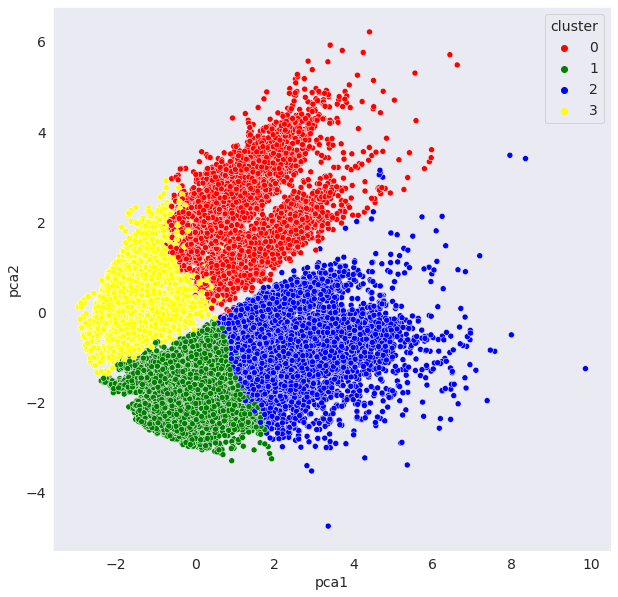

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()